In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import matplotlib as mpl
import warnings
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')
mpl.rc('font', family='NanumGothic')

In [2]:
train = pd.read_csv('train_1.csv')
test = pd.read_csv('test_1.csv')
submission = pd.read_csv('sample_submission_1.csv')

In [3]:
'''년, 월, 일 칼럼 추가'''
train['년'] = pd.DatetimeIndex(train['일자']).year
test['년'] = pd.DatetimeIndex(test['일자']).year
train['월'] = pd.DatetimeIndex(train['일자']).month
test['월'] = pd.DatetimeIndex(test['일자']).month
train['일'] = pd.DatetimeIndex(train['일자']).day
test['일'] = pd.DatetimeIndex(test['일자']).day
# 년도별, 월별, 요일별 식수가능인원, 

In [4]:
'''식사 가능인원 칼럼 추가'''
train['식사가능인원'] = train['본사정원수'] - train['본사휴가자수'] - train['본사출장자수'] - train['현본사소속재택근무자수']
test['식사가능인원'] = test['본사정원수'] - test['본사휴가자수'] - test['본사출장자수'] - test['현본사소속재택근무자수']

'''중식, 석식 참여율 칼럼 추가'''
train['중식참여율'] = train['중식계'] / train['식사가능인원']
train['석식참여율'] = train['석식계'] / train['식사가능인원']


'''자기계발의날 열 추가'''
curture = train[train['석식계']==0].index
train['자기계발의날'] = 0
train['자기계발의날'][curture] = 1
train_culture = train[train['자기계발의날']==1]

In [5]:
'''공휴일전 변수 만들기'''
train['공휴일전'] = 0
test['공휴일전'] = 0
train['공휴일전'][4] = 1 #2
train['공휴일전'][17] = 1 #
train['공휴일전'][62] = 1
# train['공휴일전'][67] = 1
train['공휴일전'][82] = 1
train['공휴일전'][131] = 1
# train['공휴일전'][130] = 1
train['공휴일전'][152] = 1
# train['공휴일전'][226] = 1
# train['공휴일전'][221] = 1
# train['공휴일전'][222] = 1
# train['공휴일전'][224] = 1
train['공휴일전'][225] = 1
# train['공휴일전'][244] = 1
train['공휴일전'][245] = 1
train['공휴일전'][266] = 1
# train['공휴일전'][267] = 1
train['공휴일전'][310] = 1
train['공휴일전'][311] = 1
train['공휴일전'][309] = 1
train['공휴일전'][330] = 1
train['공휴일전'][379] = 1
train['공휴일전'][412] = 1
train['공휴일전'][466] = 1
# train['공휴일전'][469] = 1
train['공휴일전'][470] = 1
train['공휴일전'][502] = 1
# train['공휴일전'][501] = 1
train['공휴일전'][510] = 1
train['공휴일전'][555] = 1
train['공휴일전'][565] = 1
train['공휴일전'][575] = 1
train['공휴일전'][579] = 1
train['공휴일전'][623] = 1
train['공휴일전'][651] = 1
train['공휴일전'][650] = 1
train['공휴일전'][705] = 1
# train['공휴일전'][707] = 1
train['공휴일전'][709] = 1
# train['공휴일전'][733] = 1
train['공휴일전'][732] = 1
train['공휴일전'][748] = 1
train['공휴일전'][792] = 1
train['공휴일전'][814] = 1
# train['공휴일전'][864] = 1
train['공휴일전'][863] = 1
train['공휴일전'][882] = 1
train['공휴일전'][894] = 1
train['공휴일전'][897] = 1
# train['공휴일전'][950] = 1
train['공휴일전'][951] = 1
# train['공휴일전'][952] = 1
# train['공휴일전'][953] = 1
# train['공휴일전'][954] = 1
train['공휴일전'][955] = 1
train['공휴일전'][971] = 1
# train['공휴일전'][970] = 1
train['공휴일전'][1027] = 1
train['공휴일전'][1037] = 1
train['공휴일전'][1038] = 1
train['공휴일전'][1099] = 1
train['공휴일전'][1129] = 1
train['공휴일전'][1128] = 1
train['공휴일전'][1133] = 1
train['공휴일전'][1187] = 1
# train['공휴일전'][1186] = 1

test['공휴일전'][10] = 1
test['공휴일전'][20] = 1 # 더미코딩시 test에 공휴일전후_1이 생기도록 하기위해 잠시 설정후 0으로 바꿔줌

'''공휴일후 변수 만들기'''
train['공휴일후'] = 0
test['공휴일후'] = 0

train['공휴일후'][5] = 1
train['공휴일후'][18] = 1
train['공휴일후'][63] = 1
train['공휴일후'][83] = 1
train['공휴일후'][132] = 1
train['공휴일후'][153] = 1
train['공휴일후'][246] = 1
train['공휴일후'][267] = 1
train['공휴일후'][312] = 1
train['공휴일후'][331] = 1
train['공휴일후'][380] = 1
train['공휴일후'][413] = 1
train['공휴일후'][471] = 1
train['공휴일후'][467] = 1
train['공휴일후'][503] = 1
train['공휴일후'][511] = 1
train['공휴일후'][556] = 1
train['공휴일후'][566] = 1
train['공휴일후'][576] = 1
train['공휴일후'][580] = 1
train['공휴일후'][624] = 1
train['공휴일후'][652] = 1
train['공휴일후'][706] = 1
train['공휴일후'][710] = 1
train['공휴일후'][733] = 1
train['공휴일후'][749] = 1
train['공휴일후'][793] = 1
train['공휴일후'][815] = 1
train['공휴일후'][864] = 1
train['공휴일후'][883] = 1
train['공휴일후'][895] = 1
train['공휴일후'][898] = 1
train['공휴일후'][952] = 1
train['공휴일후'][956] = 1
train['공휴일후'][972] = 1
train['공휴일후'][1028] = 1
train['공휴일후'][1039] = 1
train['공휴일후'][1100] = 1
train['공휴일후'][1130] = 1
train['공휴일후'][1134] = 1
train['공휴일후'][1188] = 1

test['공휴일후'][11] = 1
test['공휴일후'][21] = 1

'''연차쓰기좋은날 변수 만들기'''
train['연차쓰기좋은날'] = 0
test['연차쓰기좋은날'] = 0

train['연차쓰기좋은날'][4] = 1
train['연차쓰기좋은날'][5] = 1
train['연차쓰기좋은날'][17] = 1
train['연차쓰기좋은날'][62] = 1
train['연차쓰기좋은날'][63] = 1
train['연차쓰기좋은날'][82] = 1
train['연차쓰기좋은날'][83] = 1
train['연차쓰기좋은날'][131] = 1
train['연차쓰기좋은날'][132] = 1
train['연차쓰기좋은날'][151] = 1
train['연차쓰기좋은날'][152] = 1
train['연차쓰기좋은날'][153] = 1
train['연차쓰기좋은날'][245] = 1
train['연차쓰기좋은날'][246] = 1
train['연차쓰기좋은날'][310] = 1
train['연차쓰기좋은날'][311] = 1
train['연차쓰기좋은날'][330] = 1
train['연차쓰기좋은날'][379] = 1
train['연차쓰기좋은날'][412] = 1
train['연차쓰기좋은날'][413] = 1
train['연차쓰기좋은날'][470] = 1
train['연차쓰기좋은날'][471] = 1
train['연차쓰기좋은날'][466] = 1
train['연차쓰기좋은날'][467] = 1
train['연차쓰기좋은날'][502] = 1
train['연차쓰기좋은날'][503] = 1
train['연차쓰기좋은날'][510] = 1
train['연차쓰기좋은날'][511] = 1
train['연차쓰기좋은날'][555] = 1
train['연차쓰기좋은날'][556] = 1
train['연차쓰기좋은날'][565] = 1
train['연차쓰기좋은날'][650] = 1
train['연차쓰기좋은날'][651] = 1
train['연차쓰기좋은날'][705] = 1
train['연차쓰기좋은날'][709] = 1
train['연차쓰기좋은날'][732] = 1
train['연차쓰기좋은날'][733] = 1
train['연차쓰기좋은날'][748] = 1
train['연차쓰기좋은날'][749] = 1
train['연차쓰기좋은날'][792] = 1
train['연차쓰기좋은날'][793] = 1
train['연차쓰기좋은날'][815] = 1
train['연차쓰기좋은날'][864] = 1
train['연차쓰기좋은날'][882] = 1
train['연차쓰기좋은날'][883] = 1
train['연차쓰기좋은날'][895] = 1
train['연차쓰기좋은날'][971] = 1
train['연차쓰기좋은날'][972] = 1
train['연차쓰기좋은날'][1038] = 1
train['연차쓰기좋은날'][1099] = 1
train['연차쓰기좋은날'][1100] = 1
train['연차쓰기좋은날'][1129] = 1
train['연차쓰기좋은날'][1133] = 1
train['연차쓰기좋은날'][1134] = 1
train['연차쓰기좋은날'][1187] = 1
train['연차쓰기좋은날'][1188] = 1

test['연차쓰기좋은날'][10] = 1
test['연차쓰기좋은날'][11] = 1
test['연차쓰기좋은날'][20] = 1
test['연차쓰기좋은날'][21] = 1

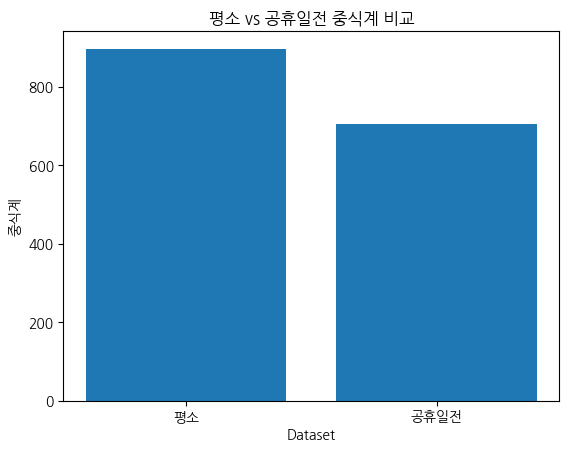

In [6]:
'''공휴일 전 살펴보기(중식계, 석식계)'''
train_before_hol = train[train['공휴일전']==1]
train_notbefore_hol = train[train['공휴일전']==0]

train_jmean = train_notbefore_hol['중식계'].mean()
train_before_hol_jmean = train_before_hol['중식계'].mean()
# 그래프 그리기(중식계)
plt.bar(['평소', '공휴일전'], [train_jmean, train_before_hol_jmean])
plt.title('평소 vs 공휴일전 중식계 비교')
plt.xlabel('Dataset')
plt.ylabel('중식계')
plt.show()
# 공휴일 전에 평소보다 중식계 수요가 200명 가량 적은것을 확인할 수 있다.

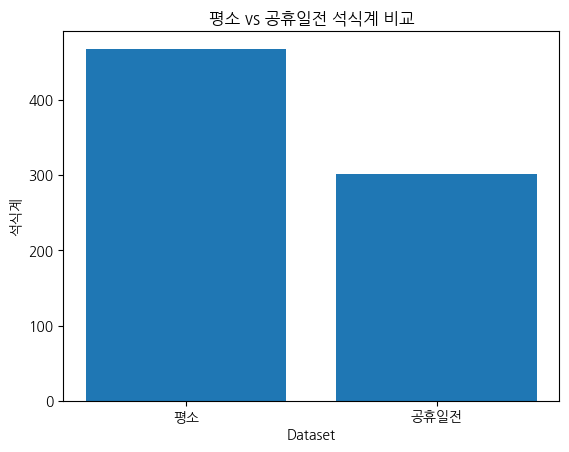

In [7]:
train_smean = train_notbefore_hol['석식계'].mean()
train_before_hol_smean = train_before_hol['석식계'].mean()
# 그래프 그리기(석식계)
plt.bar(['평소', '공휴일전'], [train_smean, train_before_hol_smean])
plt.title('평소 vs 공휴일전 석식계 비교')
plt.xlabel('Dataset')
plt.ylabel('석식계')
plt.show()
# 공휴일 전에 평소보다 석식계 수요가 150명 가량 적은것을 확인할 수 있다.

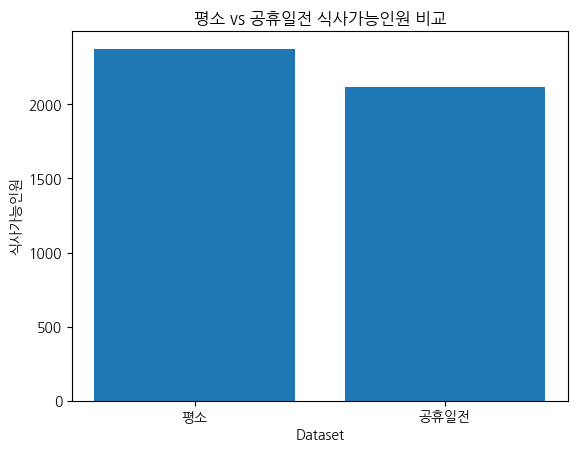

In [8]:
'''공휴일 전 살펴보기(식사가능인원)'''
train_nothol_eat = train_notbefore_hol['식사가능인원'].mean()
train_hol_eat = train_before_hol['식사가능인원'].mean()
# 그래프 그리기(휴가자수)
plt.bar(['평소', '공휴일전'], [train_nothol_eat, train_hol_eat])
plt.title('평소 vs 공휴일전 식사가능인원 비교')
plt.xlabel('Dataset')
plt.ylabel('식사가능인원')
plt.show()

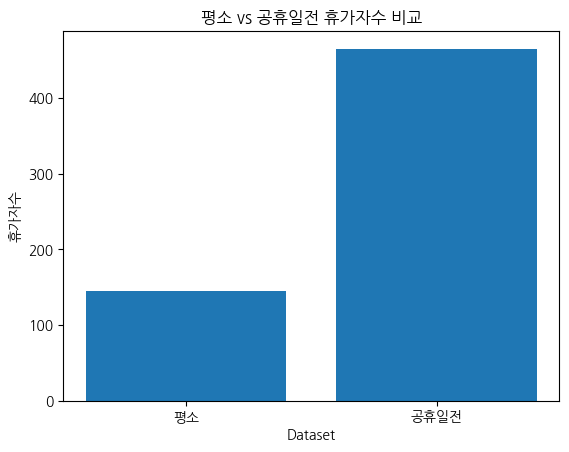

In [9]:
train_vacation = train_notbefore_hol['본사휴가자수'].mean()
train_before_hol_vacation = train_before_hol['본사휴가자수'].mean()
# 그래프 그리기(휴가자수)
plt.bar(['평소', '공휴일전'], [train_vacation, train_before_hol_vacation])
plt.title('평소 vs 공휴일전 휴가자수 비교')
plt.xlabel('Dataset')
plt.ylabel('휴가자수')
plt.show()

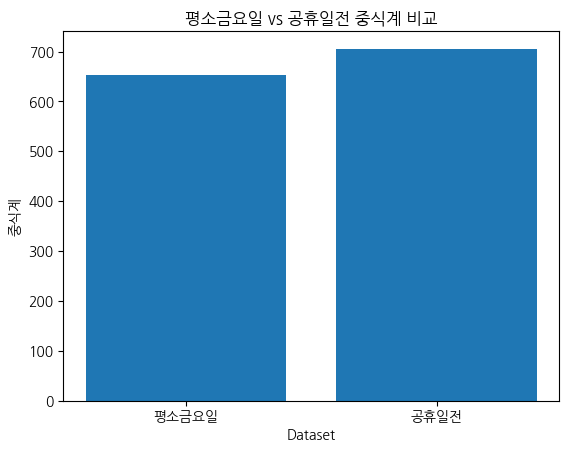

In [10]:
'''평소 금요일과 공휴일 전 비교해보기'''
pyengso_fri = train_notbefore_hol[train_notbefore_hol['요일']=='금']
train_before_hol
# 중식계 비교
pyengso_fri_lunch = pyengso_fri['중식계'].mean()
notpyengso_fri_lunch = train_before_hol['중식계'].mean()
plt.bar(['평소금요일', '공휴일전'], [pyengso_fri_lunch, notpyengso_fri_lunch])
plt.title('평소금요일 vs 공휴일전 중식계 비교')
plt.xlabel('Dataset')
plt.ylabel('중식계')
plt.show()

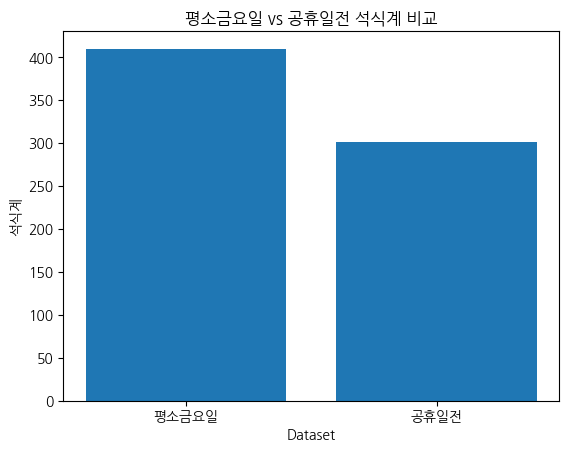

In [11]:
# 석식계비교
pyengso_fri_dinner = pyengso_fri['석식계'].mean()
notpyengso_fri_dinner = train_before_hol['석식계'].mean()
plt.bar(['평소금요일', '공휴일전'], [pyengso_fri_dinner, notpyengso_fri_dinner])
plt.title('평소금요일 vs 공휴일전 석식계 비교')
plt.xlabel('Dataset')
plt.ylabel('석식계')
plt.show()

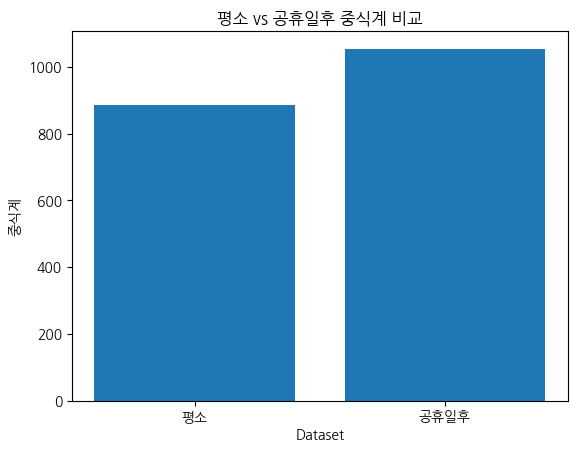

In [12]:
'''공휴일 후 살펴보기(중식계, 석식계)'''
train_after_hol = train[train['공휴일후']==1]
train_notafter_hol = train[train['공휴일후']==0]

train_jjmean = train_notafter_hol['중식계'].mean()
train_before_hol_jjmean = train_after_hol['중식계'].mean()
# 그래프 그리기(중식계)
plt.bar(['평소', '공휴일후'], [train_jjmean, train_before_hol_jjmean])
plt.title('평소 vs 공휴일후 중식계 비교')
plt.xlabel('Dataset')
plt.ylabel('중식계')
plt.show()

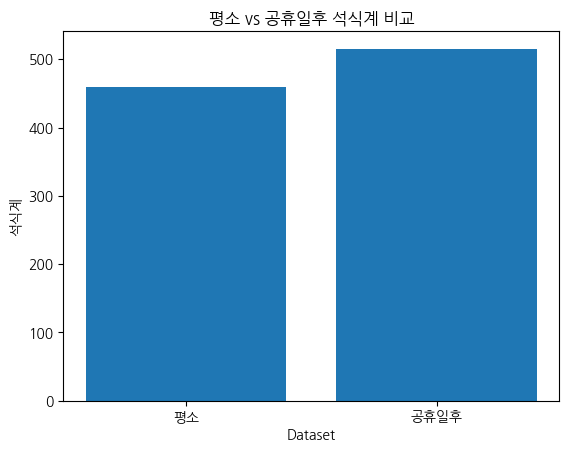

In [13]:
train_ssmean = train_notafter_hol['석식계'].mean()
train_before_hol_ssmean = train_after_hol['석식계'].mean()
# 그래프 그리기(석식계)
plt.bar(['평소', '공휴일후'], [train_ssmean, train_before_hol_ssmean])
plt.title('평소 vs 공휴일후 석식계 비교')
plt.xlabel('Dataset')
plt.ylabel('석식계')
plt.show()

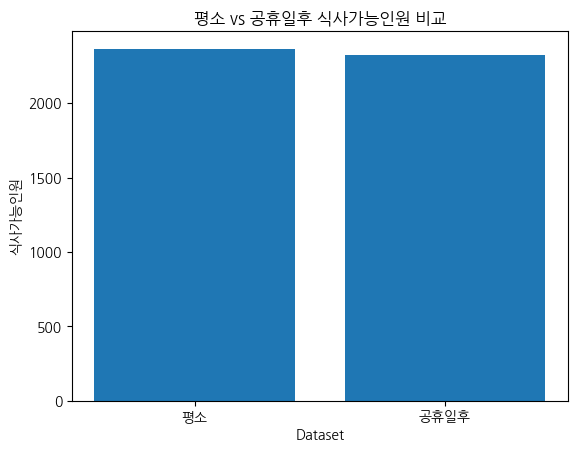

In [15]:
'''공휴일 후 살펴보기(식사가능인원)'''
train_nothol_eeat = train_notafter_hol['식사가능인원'].mean()
train_hol_eeat = train_after_hol['식사가능인원'].mean()
# 그래프 그리기(휴가자수)
plt.bar(['평소', '공휴일후'], [train_nothol_eeat, train_hol_eeat])
plt.title('평소 vs 공휴일후 식사가능인원 비교')
plt.xlabel('Dataset')
plt.ylabel('식사가능인원')
plt.show()

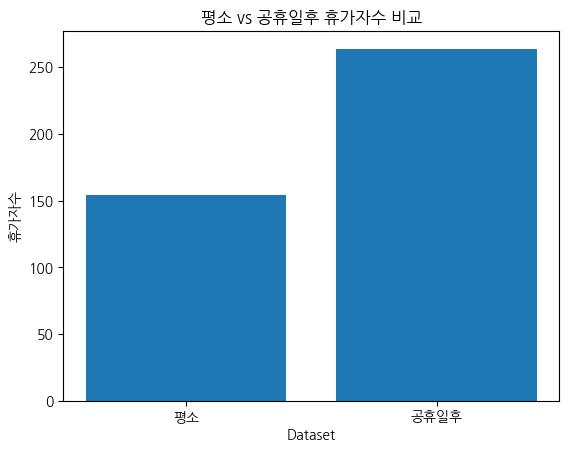

In [16]:
'''공휴일 후 살펴보기(휴가자수)'''
train_vvacation = train_notafter_hol['본사휴가자수'].mean()
train_before_hol_vvacation = train_after_hol['본사휴가자수'].mean()
# 그래프 그리기(휴가자수)
plt.bar(['평소', '공휴일후'], [train_vvacation, train_before_hol_vvacation])
plt.title('평소 vs 공휴일후 휴가자수 비교')
plt.xlabel('Dataset')
plt.ylabel('휴가자수')
plt.show()

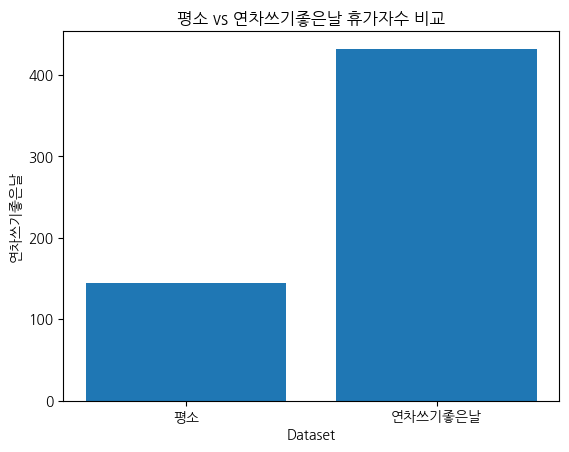

In [17]:
'''연차쓰기 좋은날 살펴보기(휴가자수)'''
train_goodfor_off = train[train['연차쓰기좋은날']==1]
train_notgoodfor_off = train[train['연차쓰기좋은날']==0]
train_off_vacation = train_goodfor_off['본사휴가자수'].mean()
train_notoff_vacation = train_notgoodfor_off['본사휴가자수'].mean()
# 그래프 그리기(휴가자수)
plt.bar(['평소', '연차쓰기좋은날'], [train_notoff_vacation, train_off_vacation])
plt.title('평소 vs 연차쓰기좋은날 휴가자수 비교')
plt.xlabel('Dataset')
plt.ylabel('연차쓰기좋은날')
plt.show()

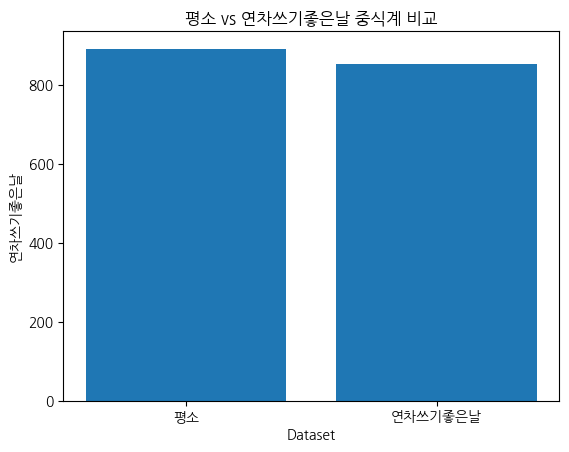

In [18]:
'''연차쓰기 좋은날 살펴보기(중식계)'''
train_off_mean = train_goodfor_off['중식계'].mean()
train_notoff_mean = train_notgoodfor_off['중식계'].mean()
# 그래프 그리기(중식계)
plt.bar(['평소', '연차쓰기좋은날'], [train_notoff_mean, train_off_mean])
plt.title('평소 vs 연차쓰기좋은날 중식계 비교')
plt.xlabel('Dataset')
plt.ylabel('연차쓰기좋은날')
plt.show()

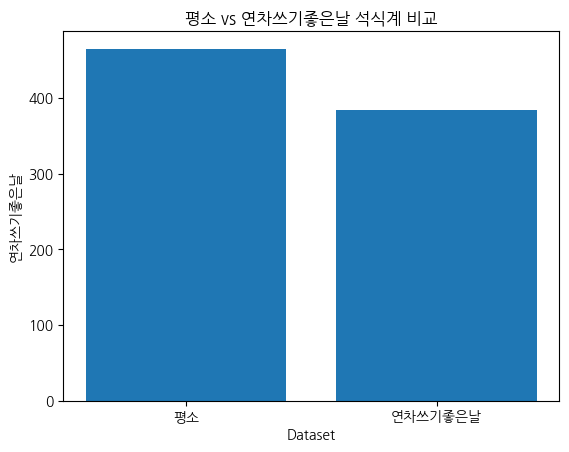

In [19]:
# 그래프 그리기 석식계
train_off_mmean = train_goodfor_off['석식계'].mean()
train_notoff_mmean = train_notgoodfor_off['석식계'].mean()
plt.bar(['평소', '연차쓰기좋은날'], [train_notoff_mmean, train_off_mmean])
plt.title('평소 vs 연차쓰기좋은날 석식계 비교')
plt.xlabel('Dataset')
plt.ylabel('연차쓰기좋은날')
plt.show()

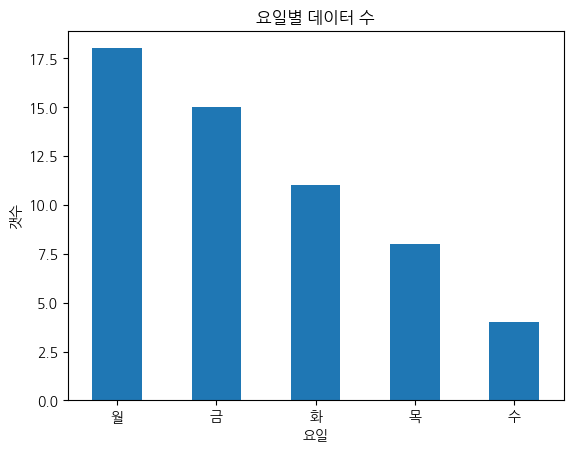

In [20]:
'''연차쓰기 좋은날 살펴보기(요일)'''
train_goodfor_off['요일'].value_counts().plot(kind='bar', rot=0)
# 그래프 타이틀 설정
plt.title('요일별 데이터 수')
plt.xlabel('요일')
plt.ylabel('갯수')
# 그래프 출력
plt.show()

<AxesSubplot:>

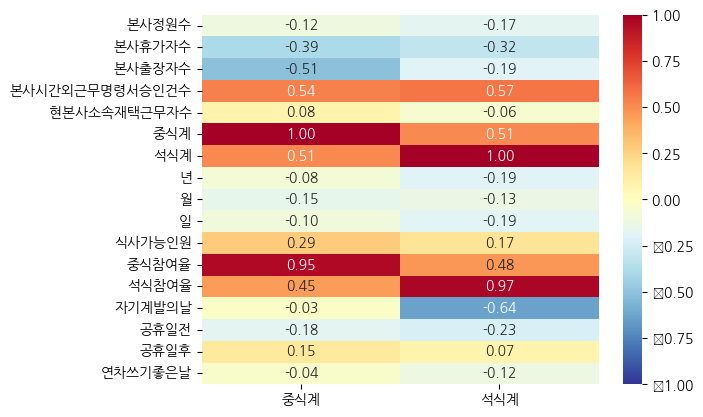

In [21]:
'''히트맵 그려보기'''
corr = train.corr()[['중식계', '석식계']]
sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdYlBu_r', vmin=-1, vmax=1)
# 해석 : 야근인원(본사시간외근무명령서승인건수)이 많으면 중식계도 올라간다는 점이 인상적이다.
#        정원 수는 당연히 양의 상관관계가 보일 줄 알았는데 의외로 약한 음의 상관관계다

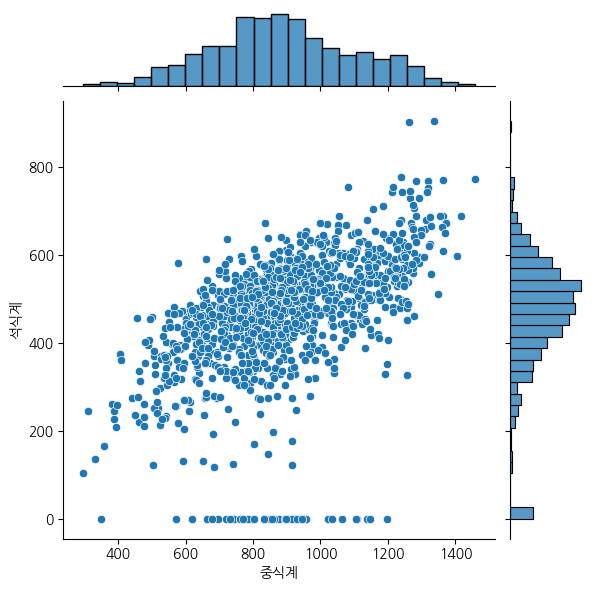

In [22]:
'''중식계, 석식계의 상관관계 확인'''
sns.jointplot(data=train,x='중식계',y='석식계')

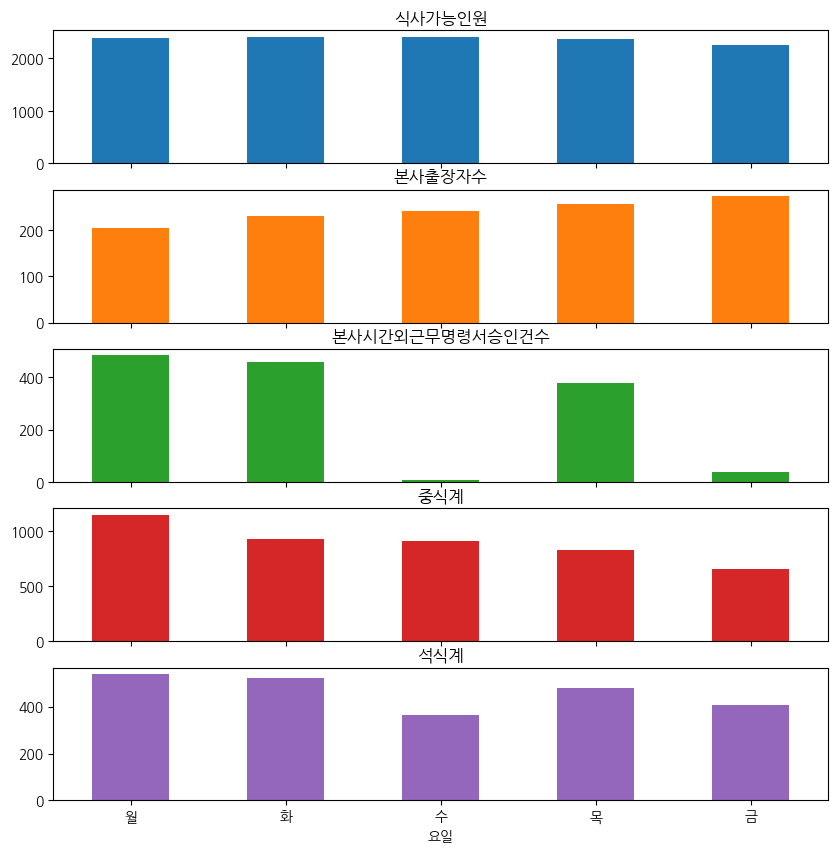

In [23]:
'''요일별 바그래프 그리기'''
train_dbar = train.groupby(['요일'])['식사가능인원', '본사출장자수', '본사시간외근무명령서승인건수', '중식계', '석식계'].mean() # 매출 금액
train_dbar = train_dbar.loc[['월', '화', '수', '목', '금']]
train_dbar.plot(kind='bar', subplots=True, figsize=(10, 10), legend=False, rot = 0)
plt.show()
# 출장자 수가 금요일에 제일 많은것을 확인. 중식, 석식계가 월요일에 가장 많은 것을 확인.
# 월요일, 화요일에는 출장자 수가 적고,야근인원은 많다. 같은 맥락으로 중식, 석식계가 월, 화에도 높다.

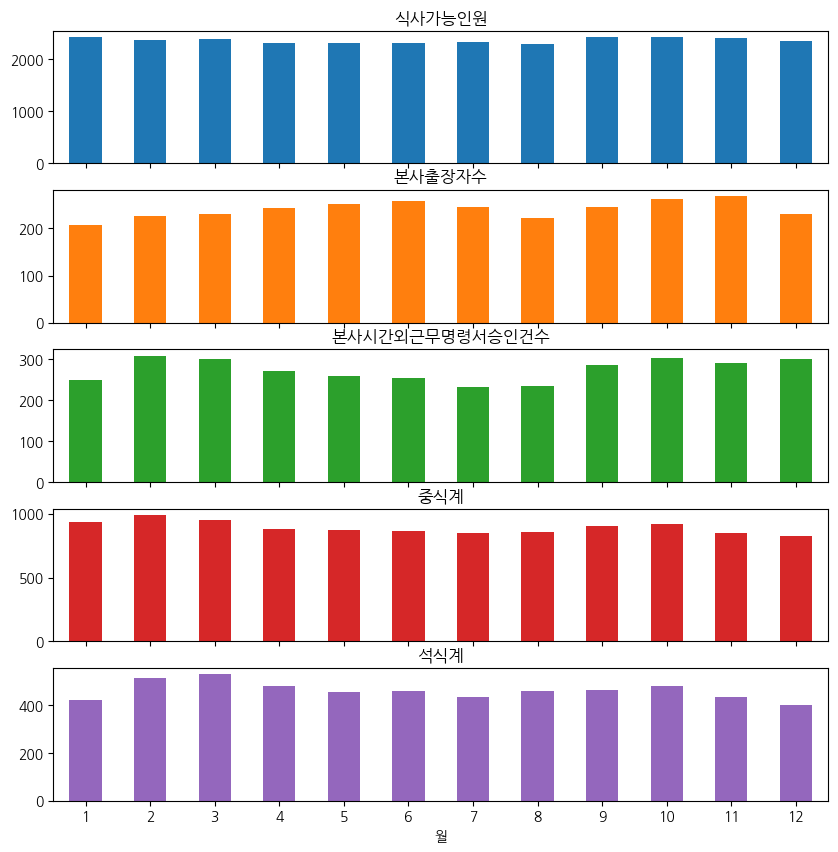

In [24]:
'''월별 바그래프 그리기'''
train_mbar = train.groupby(['월'])['식사가능인원', '본사출장자수', '본사시간외근무명령서승인건수', '중식계', '석식계'].mean() # 매출 금액
train_mbar.plot(kind='bar', subplots=True, figsize=(10, 10), legend=False, rot = 0)
plt.show()
# 출장자 수는 7월과 11월에 많다. 야근은 2,3월, 연말에 많은 것이 확인되었다.
# 야근이 적은 달에 석식계가 낮음을 확인하였다.

In [25]:
'''코로나 이전, 이후로 나누자'''
# '일자' 칼럼을 datetime 형식으로 변경
train['일자'] = pd.to_datetime(train['일자'])
# 2020-02-27 이전 데이터프레임
train_before_covid = train[train['일자'] < '2020-02-27']
# 2020-02-27 이후 데이터프레임
train_after_covid = train[train['일자'] >= '2020-02-27']

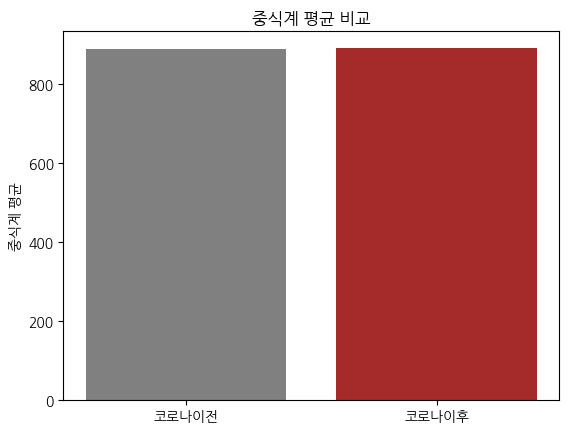

In [26]:
'''코로나 이전, 이후 평균 중식, 석식계 차이 보자(중식계)'''
a = train_before_covid.drop(columns = ['조식메뉴','중식메뉴','석식메뉴'])
b = train_after_covid.drop(columns = ['조식메뉴','중식메뉴','석식메뉴'])
# 중식계 평균 계산
a_jmean = a['중식계'].mean()
b_jmean = b['중식계'].mean()
# 바 그래프 그리기
plt.bar(['코로나이전', '코로나이후'], [a_jmean, b_jmean], color=['gray', 'brown'])
plt.title('중식계 평균 비교')
plt.ylabel('중식계 평균')
plt.show()
# 예상과는 당리 코로나 이전, 이후의 중식계 평균에 차이가 없다.

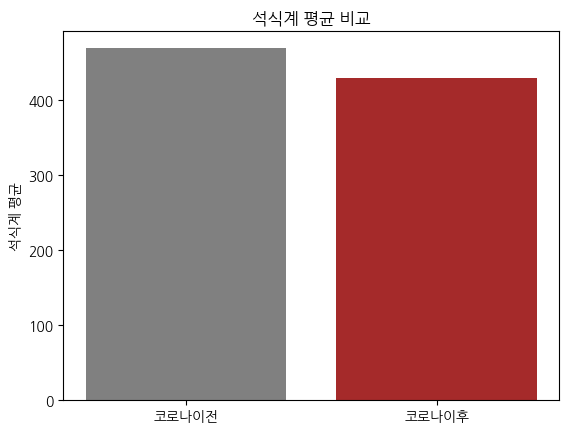

In [27]:
'''코로나 이전, 이후 평균 중식, 석식계 차이 보자(석식계)'''
# 석식계 평균 계산
a_smean = a['석식계'].mean()
b_smean = b['석식계'].mean()
# 바 그래프 그리기
plt.bar(['코로나이전', '코로나이후'], [a_smean, b_smean], color=['gray', 'brown'])
plt.title('석식계 평균 비교')
plt.ylabel('석식계 평균')
plt.show()
# 코로나 이후 석식계의 평균이 줄어들었음을 확인했다.

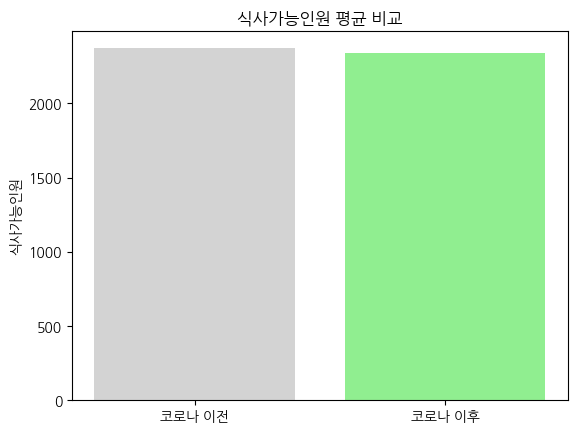

In [28]:
'''코로나 이전, 이후 평균 식사가능인원 차이 보자'''
# a, b 데이터프레임에서 식사가능인원 평균 구하기
a_mean = a['식사가능인원'].mean()
b_mean = b['식사가능인원'].mean()
means = [a_mean, b_mean]
labels = ['코로나 이전', '코로나 이후']
# 그래프 그리기
x_pos = np.arange(len(labels))
plt.bar(x_pos, means, color=['lightgray', 'lightgreen'])
plt.xticks(x_pos, labels)
plt.ylabel('식사가능인원')
plt.title('식사가능인원 평균 비교')
plt.show()
# 코로나 전,후 평균 중식계 차이가 없어서 코로나 이후 식사가능인원이 늘었는지 살펴보았다.

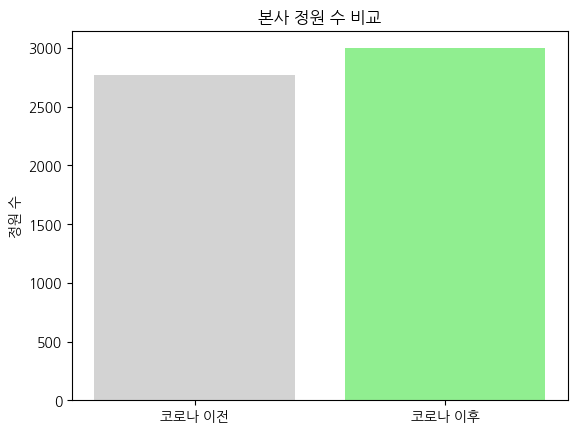

In [29]:
'''코로나 이전, 이후 본사 정원 수 살펴보기'''
# a, b 데이터프레임에서 식사가능인원 평균 구하기
a_many = a['본사정원수'].mean()
b_many = b['본사정원수'].mean()
means = [a_many, b_many]

labels = ['코로나 이전', '코로나 이후']
# 그래프 그리기
x_pos = np.arange(len(labels))
plt.bar(x_pos, means, color=['lightgray', 'lightgreen'])
plt.xticks(x_pos, labels)
plt.ylabel('정원 수')
plt.title('본사 정원 수 비교')
plt.show()
# 코로나 전,후 평균 중식계 차이가 없어서 코로나 이후 본사 정원이 늘었는지 살펴보았다.